Chapter 21
# 可视化三元高斯分布
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import matplotlib.pyplot as plt
import numpy as np

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")
    
# 大家可以自己试着把下面可视化代码写成自定义函数

### 1. 自定义高斯分布概率密度函数

In [2]:
def Mahal_d_2_pdf(d,Sigma):
    # 将马氏距离转化为概率密度
    
    scale_1 = np.sqrt(np.linalg.det(Sigma))
    scale_2 = (2*np.pi)**(3/2)
    pdf = np.exp(-d**2/2)/scale_1/scale_2
    
    return pdf

def Mahal_d(Mu, Sigma, x):
    # 计算马哈距离
  
    x_demeaned = x - Mu
    # 中心化
    inv_covmat = np.linalg.inv(Sigma)
    # 矩阵逆
    left = np.dot(x_demeaned, inv_covmat)
    mahal = np.dot(left, x_demeaned.T)
    return np.sqrt(mahal).diagonal()


# 也可以用这个函数：
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html

### 2. 生成数据

In [3]:
x1 = np.linspace(-2,2,31)
x2 = np.linspace(-2,2,31)
x3 = np.linspace(-2,2,31)

xxx1,xxx2,xxx3 = np.meshgrid(x1,x2,x3)

Mu = np.array([[0, 0, 0]])

Sigma = np.array([[1, 0.6, -0.4],
                  [0.6, 1.5, 1],
                  [-0.4, 1, 2]])

x_array = np.vstack([xxx1.ravel(),xxx2.ravel(), xxx3.ravel()]).T

# 首先计算马氏距离
d_array = Mahal_d(Mu, Sigma, x_array)
d_array = d_array.reshape(xxx1.shape)

# 将马氏距离转化成概率密度PDF
pdf_zz = Mahal_d_2_pdf(d_array, Sigma)

C:\Users\james\AppData\Local\Temp\ipykernel_7748\642966078.py:19: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(mahal).diagonal()


In [5]:
# 设定统一等高线分层
# levels = np.linspace(0,pdf_zz.max(),20)
levels_PDF = np.linspace(0,0.1,21)
levels_Mahal_D = np.linspace(0,10,21)

### 3. 绘制概率密度箱体外立面

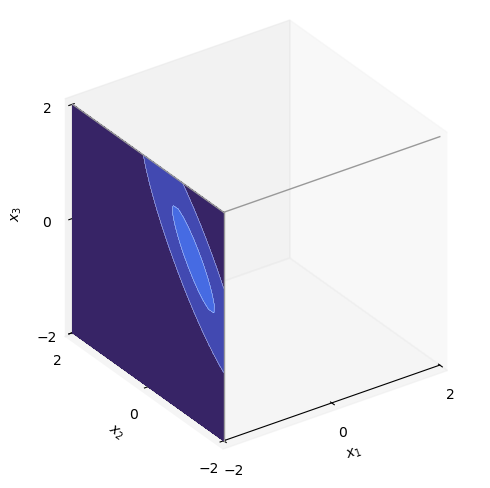

In [11]:

# 定义等高线高度

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

# 绘制三维等高线，填充
ax.contourf(xxx1[:, :, -1], 
            xxx2[:, :, -1], 
            pdf_zz[:, :, -1],
            levels = levels_PDF,
            zdir='z', offset=xxx3.max(),
            cmap = 'turbo') # RdYlBu_r

ax.contour(xxx1[:, :, -1], 
            xxx2[:, :, -1], 
            pdf_zz[:, :, -1],
            levels = levels_PDF,
            zdir='z', offset=xxx3.max(),
            linewidths = 0.25,
            colors = '1')

ax.contourf(xxx1[0, :, :], 
            pdf_zz[0, :, :], 
            xxx3[0, :, :],
            levels = levels_PDF,
            zdir='y', 
            cmap = 'turbo',
            offset=xxx2.min())

ax.contour(xxx1[0, :, :], 
            pdf_zz[0, :, :], 
            xxx3[0, :, :],
            levels = levels_PDF,
            zdir='y', 
            colors = '1',
            linewidths = 0.25,
            offset=xxx2.min())

CS = ax.contourf(pdf_zz[:, 0, :], 
            xxx2[:, 0, :], 
            xxx3[:, 0, :],
            levels = levels_PDF,
            cmap = 'turbo',
            zdir='x', 
            offset=xxx1.min())

ax.contour(pdf_zz[:, 0, :], 
            xxx2[:, 0, :], 
            xxx3[:, 0, :],
            levels = levels_PDF,
            zdir='x', 
            colors = '1',
            linewidths = 0.25,
            offset=xxx1.min())

fig.colorbar(CS, ticks=np.linspace(0,0.1,6))
# Set limits of the plot from coord limits
xmin, xmax = xxx1.min(), xxx1.max()
ymin, ymax = xxx2.min(), xxx2.max()
zmin, zmax = xxx3.min(), xxx3.max()
ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

# 绘制框线
edges_kw = dict(color='0.6', linewidth=1, zorder=1e5)
# zorder 控制呈现 artist 的先后顺序
# zorder 越小，artist 置于越底层
# zorder 赋值很大的数，这样确保 zorder 置于最顶层

ax.plot([xmin, xmax], [ymin, ymin], [zmax, zmax], **edges_kw)
ax.plot([xmin, xmin], [ymin, ymax], [zmax, zmax], **edges_kw)
ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
ax.set_xticks([-2,0,2])
ax.set_yticks([-2,0,2])
ax.set_zticks([-2,0,2])
ax.view_init(azim=-125, elev=30) 
ax.set_proj_type('ortho')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_box_aspect((1, 1, 1))
ax.grid(False)

### 4. 分层绘制等高线，沿x3

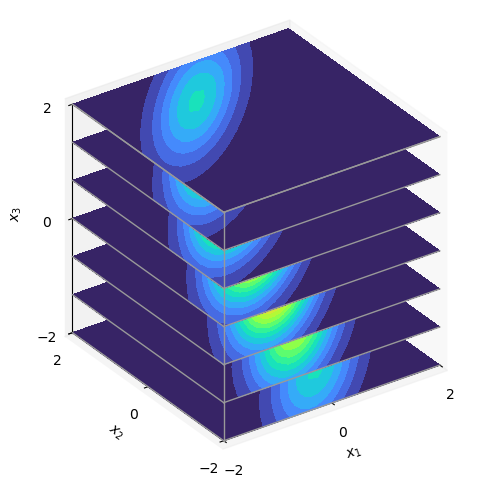

In [130]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

for idx in np.arange(0,len(x3),5):
    
    x3_idx = x3[idx]

    ax.contourf(xxx1[:, :, idx], 
                xxx2[:, :, idx], 
                pdf_zz[:, :, idx],
                levels = levels_PDF,
                zdir='z', 
                offset=x3_idx,
                cmap = 'turbo')
    
    ax.plot([xmin, xmin], [ymin, ymax], [x3_idx, x3_idx], **edges_kw)
    ax.plot([xmax, xmin], [ymin, ymin], [x3_idx, x3_idx], **edges_kw)

ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
ax.plot([xmin, xmin], [ymin, ymax], [zmax, zmax], **edges_kw)
ax.plot([xmax, xmin], [ymin, ymin], [zmax, zmax], **edges_kw)

ax.set_xticks([-2,0,2])
ax.set_yticks([-2,0,2])
ax.set_zticks([-2,0,2])
ax.view_init(azim=-125, elev=30) 
ax.set_proj_type('ortho')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.set_box_aspect((1, 1, 1))
ax.grid(False)
fig.savefig('Figures/箱体分层x3_概率密度.svg', format='svg')

### 5. 将等高线展开，沿x3

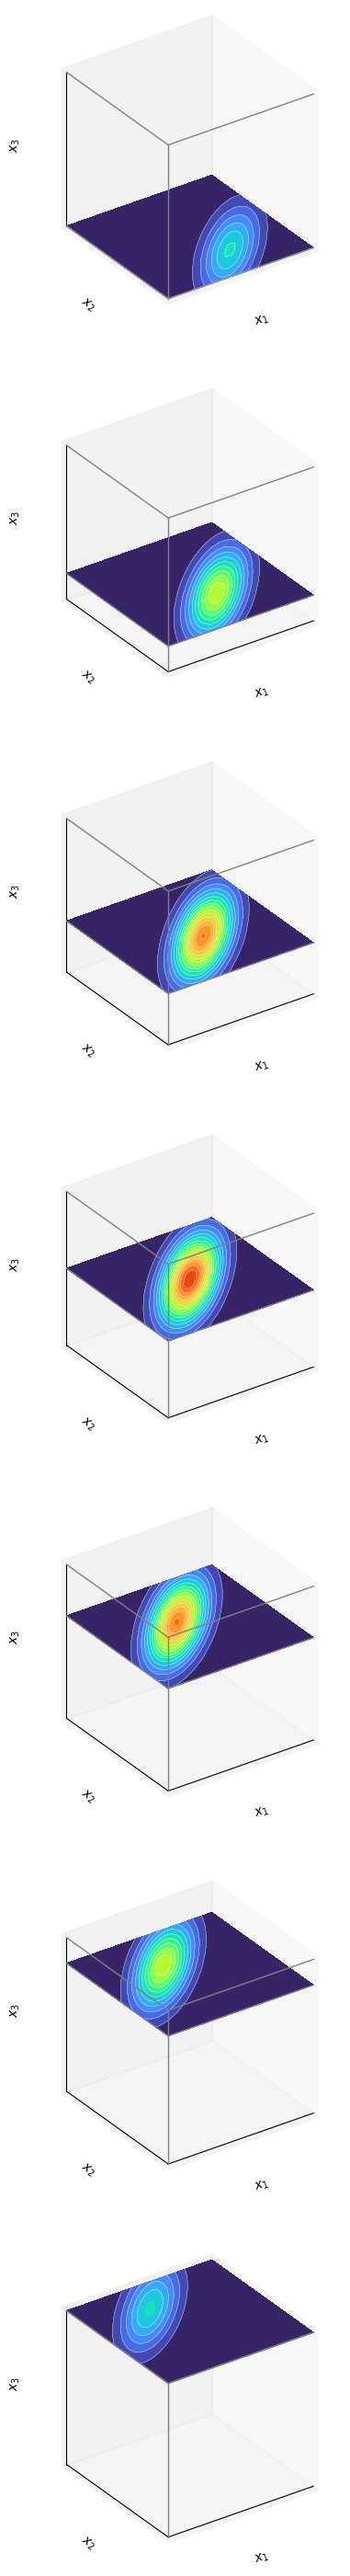

In [131]:
fig = plt.figure(figsize=(6, 36))

for fig_idx,idx in enumerate(np.arange(0,len(x3),5)):
    
    ax = fig.add_subplot(len(np.arange(0,len(x3),5)), 1, fig_idx + 1, projection='3d')
    
    x3_idx = x3[idx]

    ax.contourf(xxx1[:, :, idx], 
                xxx2[:, :, idx], 
                pdf_zz[:, :, idx],
                levels = levels_PDF,
                zdir='z', 
                offset=x3_idx,
                cmap = 'turbo')
    
    ax.contour(xxx1[:, :, idx], 
                xxx2[:, :, idx], 
                pdf_zz[:, :, idx],
                levels = levels_PDF,
                zdir='z', 
                offset=x3_idx,
               linewidths = 0.25,
                colors = '1')
    
    ax.plot([xmin, xmin], [ymin, ymax], [x3_idx, x3_idx], **edges_kw)
    ax.plot([xmax, xmin], [ymin, ymin], [x3_idx, x3_idx], **edges_kw)

    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

    # 绘制框线
    edges_kw = dict(color='0.5', linewidth=1, zorder=1e3)
    ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
    ax.plot([xmin, xmin], [ymin, ymax], [zmax, zmax], **edges_kw)
    ax.plot([xmax, xmin], [ymin, ymin], [zmax, zmax], **edges_kw)

    ax.view_init(azim=-125, elev=30) 
    ax.set_box_aspect(None)
    ax.set_proj_type('ortho')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_box_aspect((1, 1, 1))
    ax.grid(False)
fig.savefig('Figures/分层分图_x3_概率密度.svg', format='svg')

### 6. 将等高线展开，沿x2

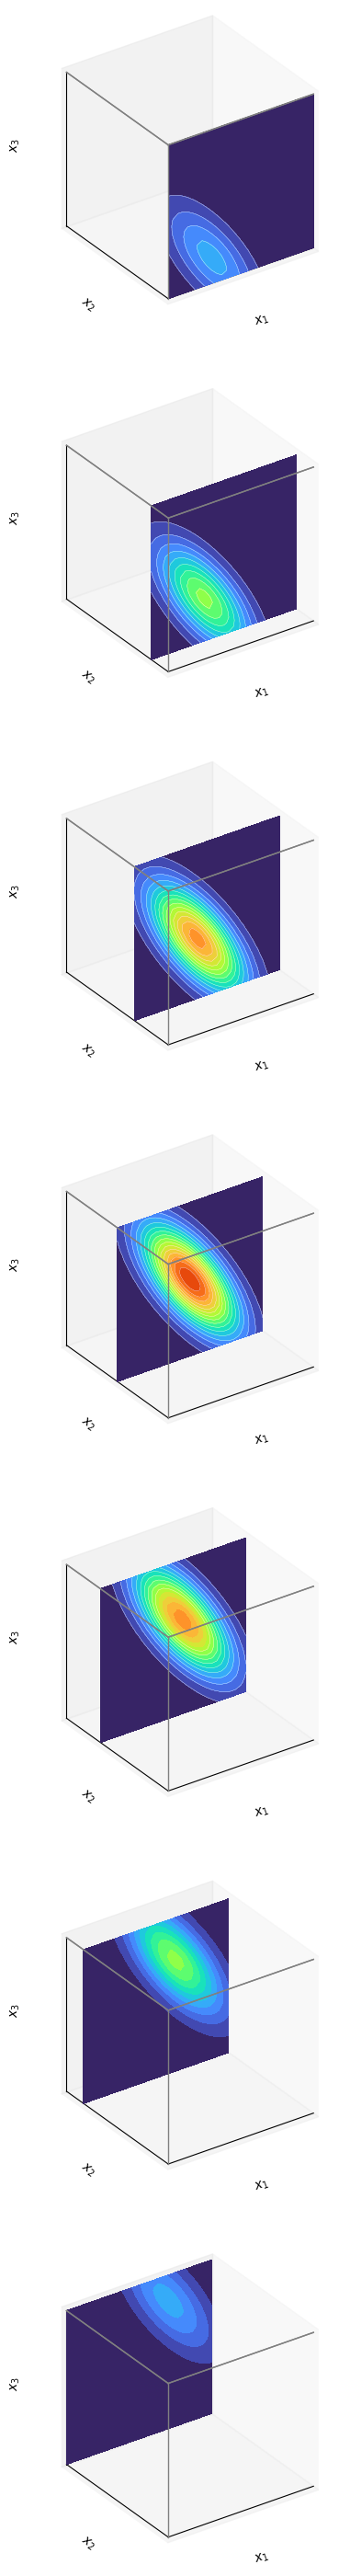

In [132]:
fig = plt.figure(figsize=(6, 36))

for fig_idx,idx in enumerate(np.arange(0,len(x2),5)):
    
    ax = fig.add_subplot(len(np.arange(0,len(x2),5)), 1, fig_idx + 1, projection='3d')
    
    x2_idx = x2[idx]

    ax.contourf(xxx1[idx, :, :], 
                pdf_zz[idx, :, :],
                xxx3[idx, :, :], 
                levels = levels_PDF,
                zdir='y', 
                offset=x2_idx,
                cmap = 'turbo')

    ax.contour(xxx1[idx, :, :], 
                pdf_zz[idx, :, :],
                xxx3[idx, :, :], 
                levels = levels_PDF,
                zdir='y', 
                offset=x2_idx,
               linewidths = 0.25,
                colors = '1')
    
    ax.plot([xmin, xmin], [ymin, ymax], [x3_idx, x3_idx], **edges_kw)
    ax.plot([xmax, xmin], [ymin, ymin], [x3_idx, x3_idx], **edges_kw)

    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

    # Plot edges
    edges_kw = dict(color='0.5', linewidth=1, zorder=1e3)
    ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
    ax.plot([xmin, xmin], [ymin, ymax], [zmax, zmax], **edges_kw)
    ax.plot([xmax, xmin], [ymin, ymin], [zmax, zmax], **edges_kw)

    # Set zoom and angle view
    ax.view_init(azim=-125, elev=30) 
    ax.set_box_aspect(None)
    ax.set_proj_type('ortho')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_box_aspect((1, 1, 1))
    ax.grid(False)
fig.savefig('Figures/分层分图_x2_概率密度.svg', format='svg')

### 7. 将等高线展开，沿x1

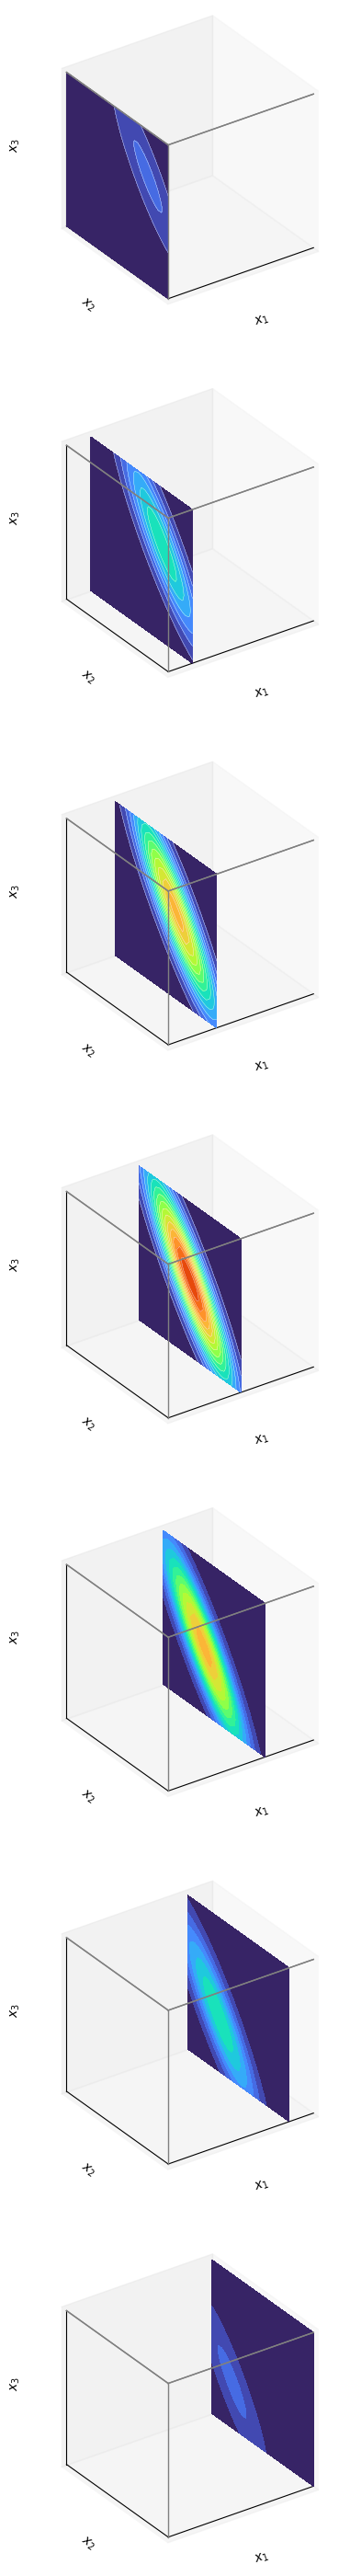

In [133]:
fig = plt.figure(figsize=(6, 36))

for fig_idx,idx in enumerate(np.arange(0,len(x1),5)):
    
    ax = fig.add_subplot(len(np.arange(0,len(x1),5)), 1, fig_idx + 1, projection='3d')
    
    x1_idx = x1[idx]

    ax.contourf(pdf_zz[:, idx, :],
                xxx2[:, idx, :], 
                xxx3[:,idx,  :], 
                levels = levels_PDF,
                zdir='x', 
                offset=x1_idx,
                cmap = 'turbo')

    ax.contour(pdf_zz[:, idx, :],
                xxx2[:, idx, :], 
                xxx3[:,idx,  :], 
                levels = levels_PDF,
                zdir='x', 
                offset=x1_idx,
               linewidths = 0.25,
                colors = '1')
    
    ax.plot([xmin, xmin], [ymin, ymax], [x3_idx, x3_idx], **edges_kw)
    ax.plot([xmax, xmin], [ymin, ymin], [x3_idx, x3_idx], **edges_kw)

    ax.set(xlim=[xmin, xmax], ylim=[ymin, ymax], zlim=[zmin, zmax])

    # 绘制框线
    ax.plot([xmin, xmin], [ymin, ymin], [zmin, zmax], **edges_kw)
    ax.plot([xmin, xmin], [ymin, ymax], [zmax, zmax], **edges_kw)
    ax.plot([xmax, xmin], [ymin, ymin], [zmax, zmax], **edges_kw)

    ax.view_init(azim=-125, elev=30) 
    ax.set_box_aspect(None)
    ax.set_proj_type('ortho')
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_box_aspect((1, 1, 1))
    ax.grid(False)
fig.savefig('Figures/分层分图_x1_概率密度.svg', format='svg')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023